In [1]:
#@ INITIALIZATION:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [57]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW:
!pip install -Uqq fastbook
!pip install bing_image_downloader
import fastbook
fastbook.setup_book()

In [59]:
#@ Downloading necesaaries dependencies:
from bing_image_downloader import downloader
import os, shutil
from pathlib import Path
from fastai.vision.all import *

In [60]:
dataset_name='bears'
path=Path(dataset_name)

In [61]:
if not path.exists():
  path.mkdir()

In [62]:
labels=['grizzly', 'black', 'teddy']

In [64]:
for l in labels:
  downloader.download(query=f'{l} bear', limit=100, output_dir=path, adult_filter_off=True)

[%] Downloading Images to /content/bears/grizzly bear


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallup.net/wp-content/uploads/2016/01/30094-bears-nature-animals-Grizzly_bear-Grizzly_Bears.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.goodfreephotos.com/albums/animals/mammals/grizzly-bear-in-the-wild.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-3WcCGQ1bzJI/UXcshw5QEwI/AAAAAAAAIns/gfJpUVE0FK8/s1600/Grizzly-Bear-7.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://jooinn.com/images/grizzly-bears-3.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://thelatebloomerhiker.files.wordpress.com/2014/11/grizzly-bear-22224-1920x1200.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://npr.brightspotcdn.c

In [65]:
fname=get_image_files(path)
fname

(#373) [Path('bears/teddy bear/Image_35.png'),Path('bears/teddy bear/Image_55.png'),Path('bears/teddy bear/Image_31.png'),Path('bears/teddy bear/Image_5.jpeg'),Path('bears/teddy bear/Image_7.jpeg'),Path('bears/teddy bear/Image_24.jpg'),Path('bears/teddy bear/Image_27.jpg'),Path('bears/teddy bear/Image_61.png'),Path('bears/teddy bear/Image_2.jpeg'),Path('bears/teddy bear/Image_96.png')...]

In [67]:
#@ Checking for the corrupted oness:
failed=verify_images(fname)
len(failed)
failed.map(Path.unlink);

In [86]:
#@ Dataloaders:
bears=DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls=bears.dataloaders(path)

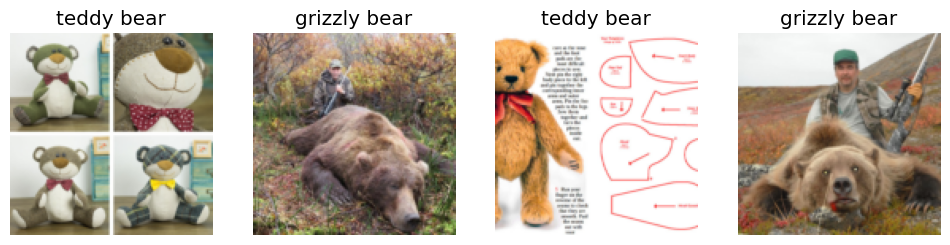

In [87]:
dls.valid.show_batch(max_n=4, nrows=1)

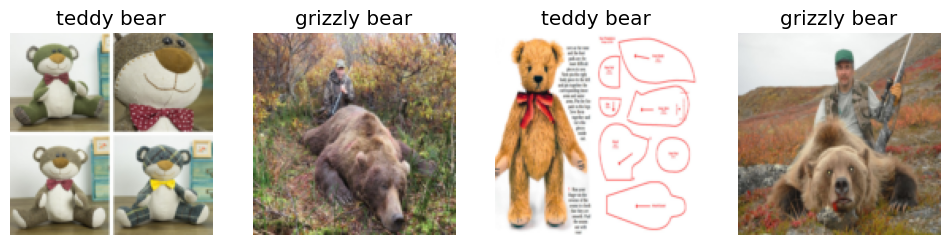

In [88]:
#@ Padding the images to stretch the lost part:
bears=bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

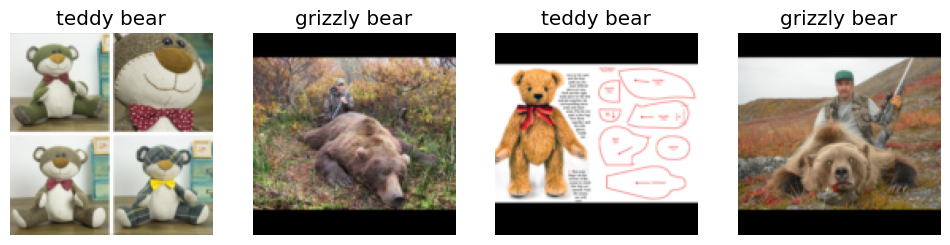

In [89]:
#@ Another approach:
bears=bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

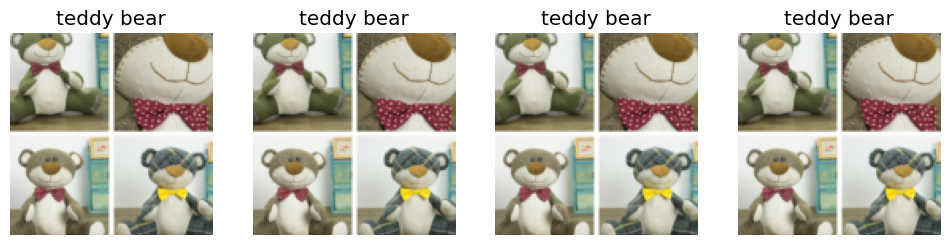

In [90]:
#@ Kind of Data augmentation:
bears=bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1, unique=True)

## Data Augmentation

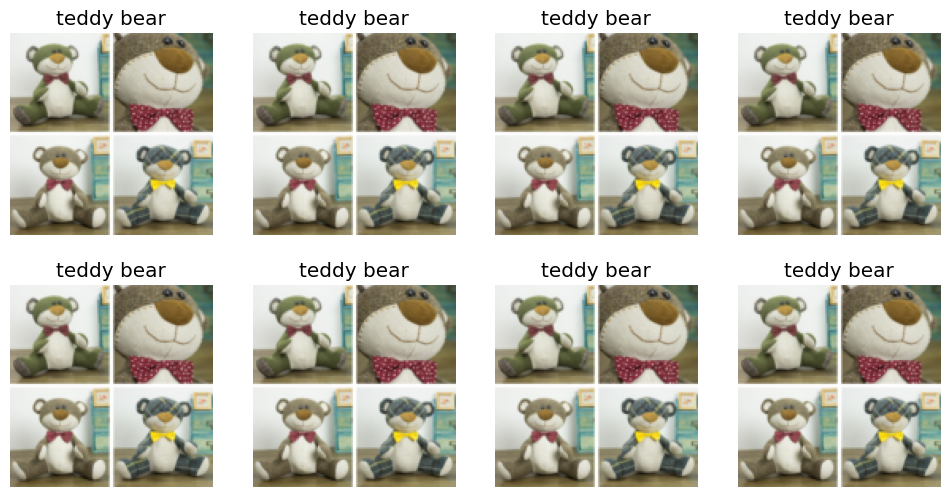

In [91]:
bears=bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls=bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)